# Into The Green: Exploring Different Colors of Nature in Walden

Class: DIGHUM 150C<br>
Instructor: Jonathan Reeve<br>
Student Name: Bonmu Ku<br>
Date: August 15th, 2020<br>

## Introduction

Without our ability to perceive colors and translate them into words, literatures would have been far less moving and powerful. Colors are not only used to describe beautiful sceneries but also to carry meanings that go beyond the mere chromatic scales. The color "green" could describe the wildnerness, but it could also gives a sense of new lives sprouting.

Henry David Thoreau builds a cabin and begins his experimental journey of living by himself in nature. And by "living," it means to be self-sufficient, survive, and ponder on life and civilization. His thoughts and experiences are later compiled into one of the most highly acclaimed text, <em>Walden</em>.

What would be the predominant colors in <em>Walden</em> and how/when would they contribute to the unique theme of the text? Perhaps there are elements only a computational analysis of text would reveal. This is a brief observational study/research, rather than an experimental study with hypothesis and independent/dependent variables. Still, it attempts to find crucial themes/motifs revolving around the colors of <em>Walden</em>.

One interesting aspect of colors is metaphors. George Lakoff famously argued how central metaphors are in our schema. He wrote that "it is pictures rather than propositions, metaphors rather than statements, which determine most of our philosophical convictions" (Lakoff 12). Walden is not just a celebration of nature but a deep, engaging philosophy of our attitudes towards nature and materialistic society. But Thoreau makes more than a simple dichotomy of nature versus civilization or good versus bad. Plus, he makes many metaphorical uses of natural phenonmena. As a result, studying colors as metaphors will be a fitting method of analyzing Walden.

Another interesting aspect of color is perception of colors. Color terms appear frequently in literature and possess rather universal, common ways of interpretation. The color "green" is expected to appear a lot in <em>Walden</em> and represent nature. But not all greens are the same. They are very context-dependent. That is, the interpretation of colors differe by plot, author, and even readers. For instance, even under the same hypernym "color," authors may convey very different moods or tones through "bright green" and "dark green". Plus, although not directly related to the content of this study/course, readers also perceive general-color terms based on their culture, past experience, or lexical availability (Sapir-Whorf Hypothesis). 

Walden would be particularly interesting precisely because, on surface, we expect the predominant color terms to be the likes of green or blue. But under these few general color categories, slight variations could carry a totally different meaning.

First step will be importing the necessary libraries and scraping the Walden. For the rest of the codes in the study, some of them were adopted from past homeworks/scratch works but the superfluous comments will be cleaned for the sake of readability.

In [1]:
import nltk
import requests
from collections import Counter
from matplotlib import pyplot as plt
import pandas as pd
import random
import numpy as np
from itertools import cycle, islice
import re
from nltk.corpus import wordnet as wn

# Getting the Walden text.
response = requests.get("https://www.gutenberg.org/files/205/205-h/205-h.htm")
rawwalden = response.text
# rawwalden.index("When I wrote the following pages")
# rawwalden.index("The sun is but a morning star.")
uncleanwalden = rawwalden[3898:613421]
ppwalden = re.sub("\r\n", " ", uncleanwalden)
removebracket = r'\<.*?\>'
nonquowalden = re.sub(removebracket, "", ppwalden)
removequos = r'\&ldquo.*?\&rdquo'
nondashwalden = re.sub(removequos, "", nonquowalden)
onemore = re.sub("rsquo", "", nondashwalden)
walden = re.sub("&mdash", "", onemore)

/Users/rsquared/anaconda3/lib/python3.7/site-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.25.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


## Part I: Methods

Wordnet is a lexical database grouped into synsets. With Wordnet, Part I will look for predominant colors occuring in the <em>Walden</em>. Unlike the mini-project in HW3, this study will first look for hypernyms of "green". Then using the tokenized text, colors in noun ("NN") or in adjective ("JJ") forms will be identified using Part of Speech (POS) tagging. Subsequently, with an appropriate hypernym, for example "visual_property", it will go through all appropriate color terms under the hypernym "visual_property" and will be made into a unique list `colorlist`. It will then be converted into a dataframe and visualized in the form of color pie chart.

## Part I: Findings Using Wordnet

15
          frequency
color              
carmine           1
brown            12
halo              2
amber             1
gray             12
scarlet           2
yellow           22
blue             34
crimson           1
azure             6
green            60
coral             2
black            28
cerulean          1
purple            1


Text(0.5, 1.0, 'Figure 1: Color Pie Chart of Predominant Color Terms in Walden')

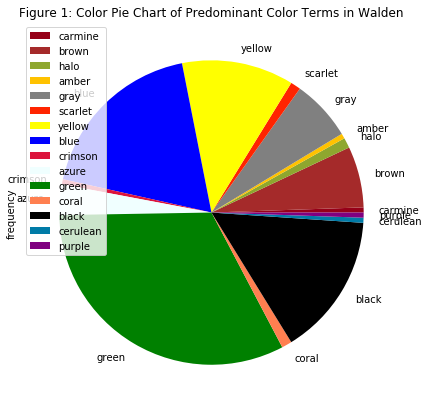

In [2]:
# Reference/Help from: https://gitlab.com/digitalhumanitiesatberkeley/computational-literary-analysis/-/blob/master/Notes/11-WordNet.ipynb

waldenlowered = nltk.word_tokenize(walden.lower())
walden_wordtokenized = [token for token in waldenlowered if token.isalpha()]

def hyperfunc(word): 
    return word.hypernyms()

green = wn.synsets("green")[0]
green.tree(rel=hyperfunc)

# this returns:
# [Synset('green.n.01'),
#  [Synset('chromatic_color.n.01'),
#   [Synset('color.n.01'),
#    [Synset('visual_property.n.01'),
#     [Synset('property.n.02'),
#      [Synset('attribute.n.02'),
#       [Synset('abstraction.n.06'), [Synset('entity.n.01')]]]]]]]]

def isVisualproperty(word):
    hypernym = hypernymcall(word)
    if hypernym is not None: 
        return hypernymcall(word) == visualprop
    else: 
        return False

def hypernymcall(word): 
    synsets = wn.synsets(word)
    if len(synsets) > 0: 
        synset = synsets[0]
        while synset.min_depth() > 4: 
            hypernyms = synset.hypernyms()
            if len(hypernyms) > 0:
                synset = hypernyms[0]
            else: 
                break
        return synset
    else: 
        return
    
visualprop = wn.synsets("visual_property")[0]

# now using the POS tag in the lect
waldentagged = nltk.pos_tag(walden_wordtokenized)
waldenNN_or_JJ = set([word for word, pos in waldentagged if pos == 'NN' or pos == "JJ"])

colorlist = [token for token in list(waldenNN_or_JJ) if isVisualproperty(token)]
colorlist

# colorlist returns the below:
# ['scarlet',
#  'complexion',
#  'green',
#  'whiteness',
#  'gray',
#  'red',
#  'sheen',
#  'cerulean',
#  'purple',
#  'shine',
#  'splendor',
#  'color',
#  'yellow',
#  'brightness',
#  'crimson',
#  'carmine',
#  'coral',
#  'halo',
#  'black',
#  'amber',
#  'tint',
#  'hue',
#  'brown',
#  'blue',
#  'azure']

# I will first clean the color list that are not actual colors or not in the RGB chart.
cleaned_colorlist = ['carmine', 'brown', 'halo', 'amber', 'gray', 'scarlet', 'yellow', 'blue', 'crimson', 'azure', 'green', 'coral', "black", 'cerulean', "purple"]
print(len(cleaned_colorlist))

miniproj_df = pd.DataFrame({"color": cleaned_colorlist,
                           "frequency": [1, 12, 2, 1, 12, 2, 22, 34, 1, 6, 60, 2, 28, 1, 1]})
miniproj_df.set_index("color", inplace=True)
print(miniproj_df)

# if there was no corresponding color by string, I manually found each Hex Color code
projcolors = ['#960018', 'brown', '#8ea72f', '#FFC200', 'gray', '#ff2400', 'yellow', 'blue', 'crimson', 'azure', 'green', 'coral', "black", "#007BA7", "#800080"]
miniproj_plot = miniproj_df.plot.pie(y="frequency", figsize=(7,7), colors=projcolors)
plt.title("Figure 1: Color Pie Chart of Predominant Color Terms in Walden")


The results seems to be more colorful and less green-dominating than the study initially conjectured. Obviously green and blue-related colors are frequent, but gray and black colors are rather surprising. Moreover, the range of different colors is astonishing. For example, colors like amber, coral, carmine are not the usual colors appearing in our daily lives. It lend an insight on how rich color vocabularies are in <em>Walden</em>. But at the same time, the colors in the pie chart are not necessarily the same color author intended to convey nor are they identical. As mentioned in the Introduction, it is necessary to investigate "how" these colors are used. First, the study chooses six main, most frequently appearing color terms: Green, Brown, Blue, Yellow, Gray, and Black.

## Part II: Methods

Using the six main colors identified from Part I, Part II will conduct a Part of Speech tagging analysis, especially in regards to adjectives attached to noun color terms. Using `nltk`'s `pos_tag` method, the tokens from the text will be tagged into different parts of speech like noun, verb, adjective. To make sure that these adjectives-colorterms are attached, it will be made into bigrams using zip. Then using `collections` module's `Counter` and `most_common` method, the results will be returned in tuples and then made into the dataframe. To adhere to DRY principle, the study modified functions to make it reproducible for six colors.

## Part II: Findings Using POS Tagging.

In [3]:
# Reference/Help from: https://gitlab.com/digitalhumanitiesatberkeley/computational-literary-analysis/-/blob/master/Notes/12-POS-and-Corpora.ipynb

# Adjectives of Green
waldenlowered = nltk.word_tokenize(walden.lower())
walden_wordtokenized = [token for token in waldenlowered if token.isalpha()]
JJgreen = []
maincolorterms = ["green", "brown", "blue", "yellow", "gray", "black"]

# DRY!
def adjectiveColors(tokens, colorterm):
    results = []
    for color in colorterm:
        waldentags = nltk.pos_tag(tokens)
        bigram_lists = list(zip(waldentags, waldentags[1:]))
        for item in bigram_lists:
            if item[0][1] == "JJ":
                if item[1][0] == color:
                    JJgreen.append(item)
        results = np.append(results, Counter(JJgreen).most_common(20))
    return results

adjectiveColors(walden_wordtokenized, maincolorterms)
# set(adjectiveColors(walden_wordtokenized, maincolorterms))

# I will make it to a dictionary first and then to a dataframe

adjs_and_colors_dict = {"Adjectives": ["long", "little", "great", "near", "graceful", "deep", "bright", "perennial", "dark", "rough", "light", "greenish", "hoary", "vast", "flat", "clear", "cold", "hundred", "chart"],
                       "Colors": ["green", "green","green","green","green","green","green","green","brown", "brown", "blue", "blue", "blue", "blue", "gray", "gray","gray", "black", "black"],
                       "Frequency": [2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,1 ,1, 1,1,1, 1, 1]}

adjs_and_colors_dict

adjscolorsdf = pd.DataFrame(adjs_and_colors_dict)
adjscolorsdf

adjscolorsdf.style.set_caption("Figure 2: Adjective-Colors Bigrams in Walden and Frequencies")

,Adjectives,Colors,Frequency
0,long,green,2
1,little,green,1
2,great,green,1
3,near,green,1
4,graceful,green,1
5,deep,green,1
6,bright,green,1
7,perennial,green,1
8,dark,brown,2
9,rough,brown,1


Part-of-Speech (POS) tagging analysis reveals a somewhat different picture than Part I. For example, brown or black is not so frequently attached to adjectives, and the adjectives (attached with "brown") are "dark" and "rough". This gives a sense that brown could represent a rather unwelcoming or harsh side of nature (soil, to be exact). Moreover, adjectives attached with "blue" shows that the blue in <em>Walden</em> is not the typical blue in the color pie chart above, but rather an almost grue, emerald, magnificent blue that we see from a clear sky. The example adjective-noun bigrams are "greenish blue" or "vast blue".

## Part III: Methods

Now, since Part II gave an insight on how these color terms are used, it could be reinforced with "when" these color terms are employed. <em>Walden</em> especially moves from season to season, from summer (July 4th, when his stay started) to winter then to spring. Different seasons capture different tones/moods/philosophies as well as colors. The Lexical Dispersion Plot and the six main colors will be used for visualization. To take one more step, using LancasterStemmer, this study found that even after the stemming some colors do not reduce to the most basic color forms. For instance, "evergreen" was used a few time in the text, but since it is not reduced to "green" it should be considered as a separate color at least in this analysis. Although the difference is very nunanced, it would be helpful in determining when and where "evergreen" appears differently from "green".

## Part III: Findings using Lexical Dispersion Plot

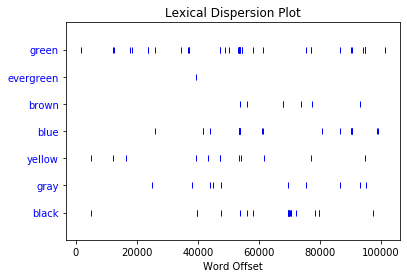

Figure 3: Lexical Dispersion Plots of Main Colors in Walden


In [4]:
# Reference/Help from: https://gitlab.com/digitalhumanitiesatberkeley/computational-literary-analysis/-/blob/master/Notes/05-nltk-intro.ipynb

lancasterStemmer = nltk.stem.lancaster.LancasterStemmer
# initialize
lancasterStemmer()
def lancStem(word):
    funclancasterStemmer = lancasterStemmer()
    stem = funclancasterStemmer.stem(word)
    return stem
lancStem('evergreen')
# returns "evergreen"

waldentext = nltk.Text(walden_wordtokenized)

# # please uncomment to view concordances result!
# waldentext.concordance("green")
# waldentext.concordance("brown")
# waldentext.concordance("blue")
# waldentext.concordance("yellow")
# waldentext.concordance("gray")

waldentext.dispersion_plot(["green", "evergreen", "brown", "blue", "yellow", "gray", "black"])
# couldn't figure out how to title nonetype...
print("Figure 3: Lexical Dispersion Plots of Main Colors in Walden")


The Lexical Dispersion Plot provides intriguing observations. For example, "brown" only shows up in the second half of the Walden. It goes almost same for the "black". Except for one occurence, both "brown" and "black" do not appear in the plot in beginning, which is summer since it started from July 4th. Plus, <em>Walden's</em> later chapters are titled "House-warming", "Winter Visitors", and "Winter Animals". Just from the titles, it could be inferred which colors will be predominant based on seasonal sections. It makes sense empirically why brown appears more in later (winter) chapters, since the leaves and forests will turn brown or disappear. <br>

In addition, the "evergreen" only appears once but in the first half and not in the second half, while "green" appears rather consistently throughout the chapters. As a result, "evergreen" could have been used to set an emphasis from many different versions and adjective-noun bigrams of green. 

## Part III: Simulation using Rule-based Chatbot

Based on the feedback received on Zulip, I wrote a short, limited, rule-based program trying to determine the season of given section, based on the colors. For example, if you copy and paste a section of walden - "The various shades of the sand are singularly rich and agreeable, embracing the different iron colors, brown, gray, yellowish, and reddish" (Thoreau 102) then it will guess if it is close to summer or winter. The section was from "Spring" chapter right after "The Pond in Winter" chapter, and thus closer to winter. Simply put "done" if you want to skip.

In [5]:
def textpreprocessing(textinput):
    textinput = re.sub('[\'.,!@#$]', '', textinput)
    textinput = textinput.lower()
    return textinput


def splitkeywordcheck(keyword, textinput):
    i=0
    while i < len(keyword):
        if keyword[i] in textinput:
            return True
        else:
            i += 1
    
def bot():
    print("BonmuBot starting... Copy and Paste Any Section of Walden")
    while True:
        textinput = input("Your Walden Section: \n")
        textinput = textpreprocessing(textinput)
        splittextinput = textinput.split()
        if splitkeywordcheck(["hi", "hello"], splittextinput):
            print("Bot Output: " + "Hello! So nice to meet you. I'm BonmuBot.")
#         Predicting Summer
        elif splitkeywordcheck(["blue", "evergreen"], splittextinput):
            match = re.search(r'(blue|evergreen)', textinput)
            output = "\nBased on the color ({}) in the your text input, I think this must be a section during/close to summer!".format(match.group())
            print('\nBot Output: ' + output)
#         Predicting Winter
        elif splitkeywordcheck(["gray", "brown", "black"], splittextinput):
            match = re.search(r'(gray|brown|black)', textinput)
            output = "\nBased on the color ({}) in the your text input, I think this must be a section during/close to winter!".format(match.group())
            print('\nBot Output: ' + output)
        elif textinput == "done":
            break
        else:
            print("Sorry. I can't seem to predict based on this input text alone :(")
            
bot()

# For example,

# if your input was:
# Your Walden Section: 
# There, in a very secluded and shaded spot, under a spreading white-pine, there was yet a clean, firm sward to sit on. I had dug out the spring and made a well of clear gray water, where I could dip up a pailful without roiling it, and thither I went for this purpose almost every day in midsummer, when the pond was warmest.

# Bot Output: 
# Based on the color (gray) in the your text input, I think this must be a section during the fall or winter!

BonmuBot starting... Copy and Paste Any Section of Walden
Your Walden Section: 
done


## Conclusion, Future Directions/Limitations

In conclusion, this observational study revealed or reaffirmed the use of colors in the <em>Walden</em>. Of course, the ultimate theme of Walden is not a colorful, harmonious nature but self and critique of culture/society. Yet if Thoreau wrote a passionate essay without immersing himself in the nature, <em>Walden</em> would not have persuaded so many people. Showing rather than telling is a true power of literary works, and Thoreau achieves it by employing wide range of colors.

To be more specific, he amplifies his use of color through adjectives. Blue, for example, is not the artificial blue one would see in clothes or TV screen (although TV was not yet invented in Thoreau's time). It is the "greenish", "vast", "grace" blues and greens that serves and reflects the nature and self.

Moreover, a cycle of season is important element in <em>Walden's</em> plot and theme. While he does not rely on human-invented calendar, he is inevitably at the mercy of changing nature. Colors reflect such theme and enriches the background in different sections of the text. For instance, during the winter, there are "dark" and "rough" browns but it also means less interaction even with the visitors and more time for solitude and pondering of the self. 

Overall, colors are instrumental in fully immersing the reader of Thoreau's tenure in the nature. While this study focused on "how" and "when" prominent colors were employed, it could benefit from an additional analysis of the dynamics between colors. For example, do "green" and "gray" appear in a complementary or contrasting manner ? Are they appearing together or separately? Social Network Analysis could be helpful in this regard.


Word Count: 1580 Words

## References

Lakoff, George. <em>Moral politics: How liberals and conservatives think.</em> University of Chicago Press, 2010.

Thoreau, Henry D. Walden. "or Life in the Woods." <em>Boston: Ticknor and Fields</em> (1854).